In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import TruncatedSVD


In [2]:
file_path = "AirQualityUCI.csv" 
data = pd.read_csv(file_path, sep=';', decimal=',')

print("First 5 rows of the dataset:")
print(data.head(10))


First 5 rows of the dataset:
         Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
5  10/03/2004  23.00.00     1.2       1197.0      38.0       4.7   
6  11/03/2004  00.00.00     1.2       1185.0      31.0       3.6   
7  11/03/2004  01.00.00     1.0       1136.0      31.0       3.3   
8  11/03/2004  02.00.00     0.9       1094.0      24.0       2.3   
9  11/03/2004  03.00.00     0.6       1010.0      19.0       1.7   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0  

In [3]:
print(f"Original dataset shape: {data.shape}")
print(data.isnull().sum())

Original dataset shape: (9471, 17)
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64


In [4]:
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')

data = data.replace(-200, np.nan)

missing_threshold = 0.5  
missing_ratios = data.isnull().mean()
columns_to_drop = missing_ratios[missing_ratios > missing_threshold].index
data = data.drop(columns=columns_to_drop)

data = data.drop_duplicates()

data = data.dropna()

data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6941 non-null   object 
 1   Time           6941 non-null   object 
 2   CO(GT)         6941 non-null   float64
 3   PT08.S1(CO)    6941 non-null   float64
 4   C6H6(GT)       6941 non-null   float64
 5   PT08.S2(NMHC)  6941 non-null   float64
 6   NOx(GT)        6941 non-null   float64
 7   PT08.S3(NOx)   6941 non-null   float64
 8   NO2(GT)        6941 non-null   float64
 9   PT08.S4(NO2)   6941 non-null   float64
 10  PT08.S5(O3)    6941 non-null   float64
 11  T              6941 non-null   float64
 12  RH             6941 non-null   float64
 13  AH             6941 non-null   float64
dtypes: float64(12), object(2)
memory usage: 813.4+ KB


/var/folders/yv/qjlnm_n53xndndtthnjg42bc0000gn/T/ipykernel_7094/256109146.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')


(None,
          Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
 0  10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
 1  10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
 2  10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
 3  10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
 4  10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   
 
    NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
 0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
 1    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
 2    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
 3    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
 4    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
 
        AH  
 0  0.7578  
 1  0.7255  
 2  0.7502  
 3  0.7867  
 4  0.7888  )

In [5]:
print(data.shape)

(6941, 14)


In [6]:
print(data.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [7]:
cleaned_file_path = "Cleaned_AirQualityUCI.csv" 
data = pd.read_csv(cleaned_file_path, sep=';', decimal=',')

print("First 5 rows of the dataset:")
print(data.head(10))


First 5 rows of the dataset:
  Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0  10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166...                                                               
1  10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0...                                                               
2  10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0...                                                               
3  10/03/2004,21.00.00,2.2,1376.0,9.2,948.0,172.0...                                                               
4  10/03/2004,22.00.00,1.6,1272.0,6.5,836.0,131.0...                                                               
5  10/03/2004,23.00.00,1.2,1197.0,4.7,750.0,89.0,...                                                               
6  11/03/2004,00.00.00,1.2,1185.0,3.6,690.0,62.0,...                                                               
7  11/03/2004,01.00.00,1.0,1136.0,3.3,672.0

### EDA

/var/folders/yv/qjlnm_n53xndndtthnjg42bc0000gn/T/ipykernel_7094/129193224.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')


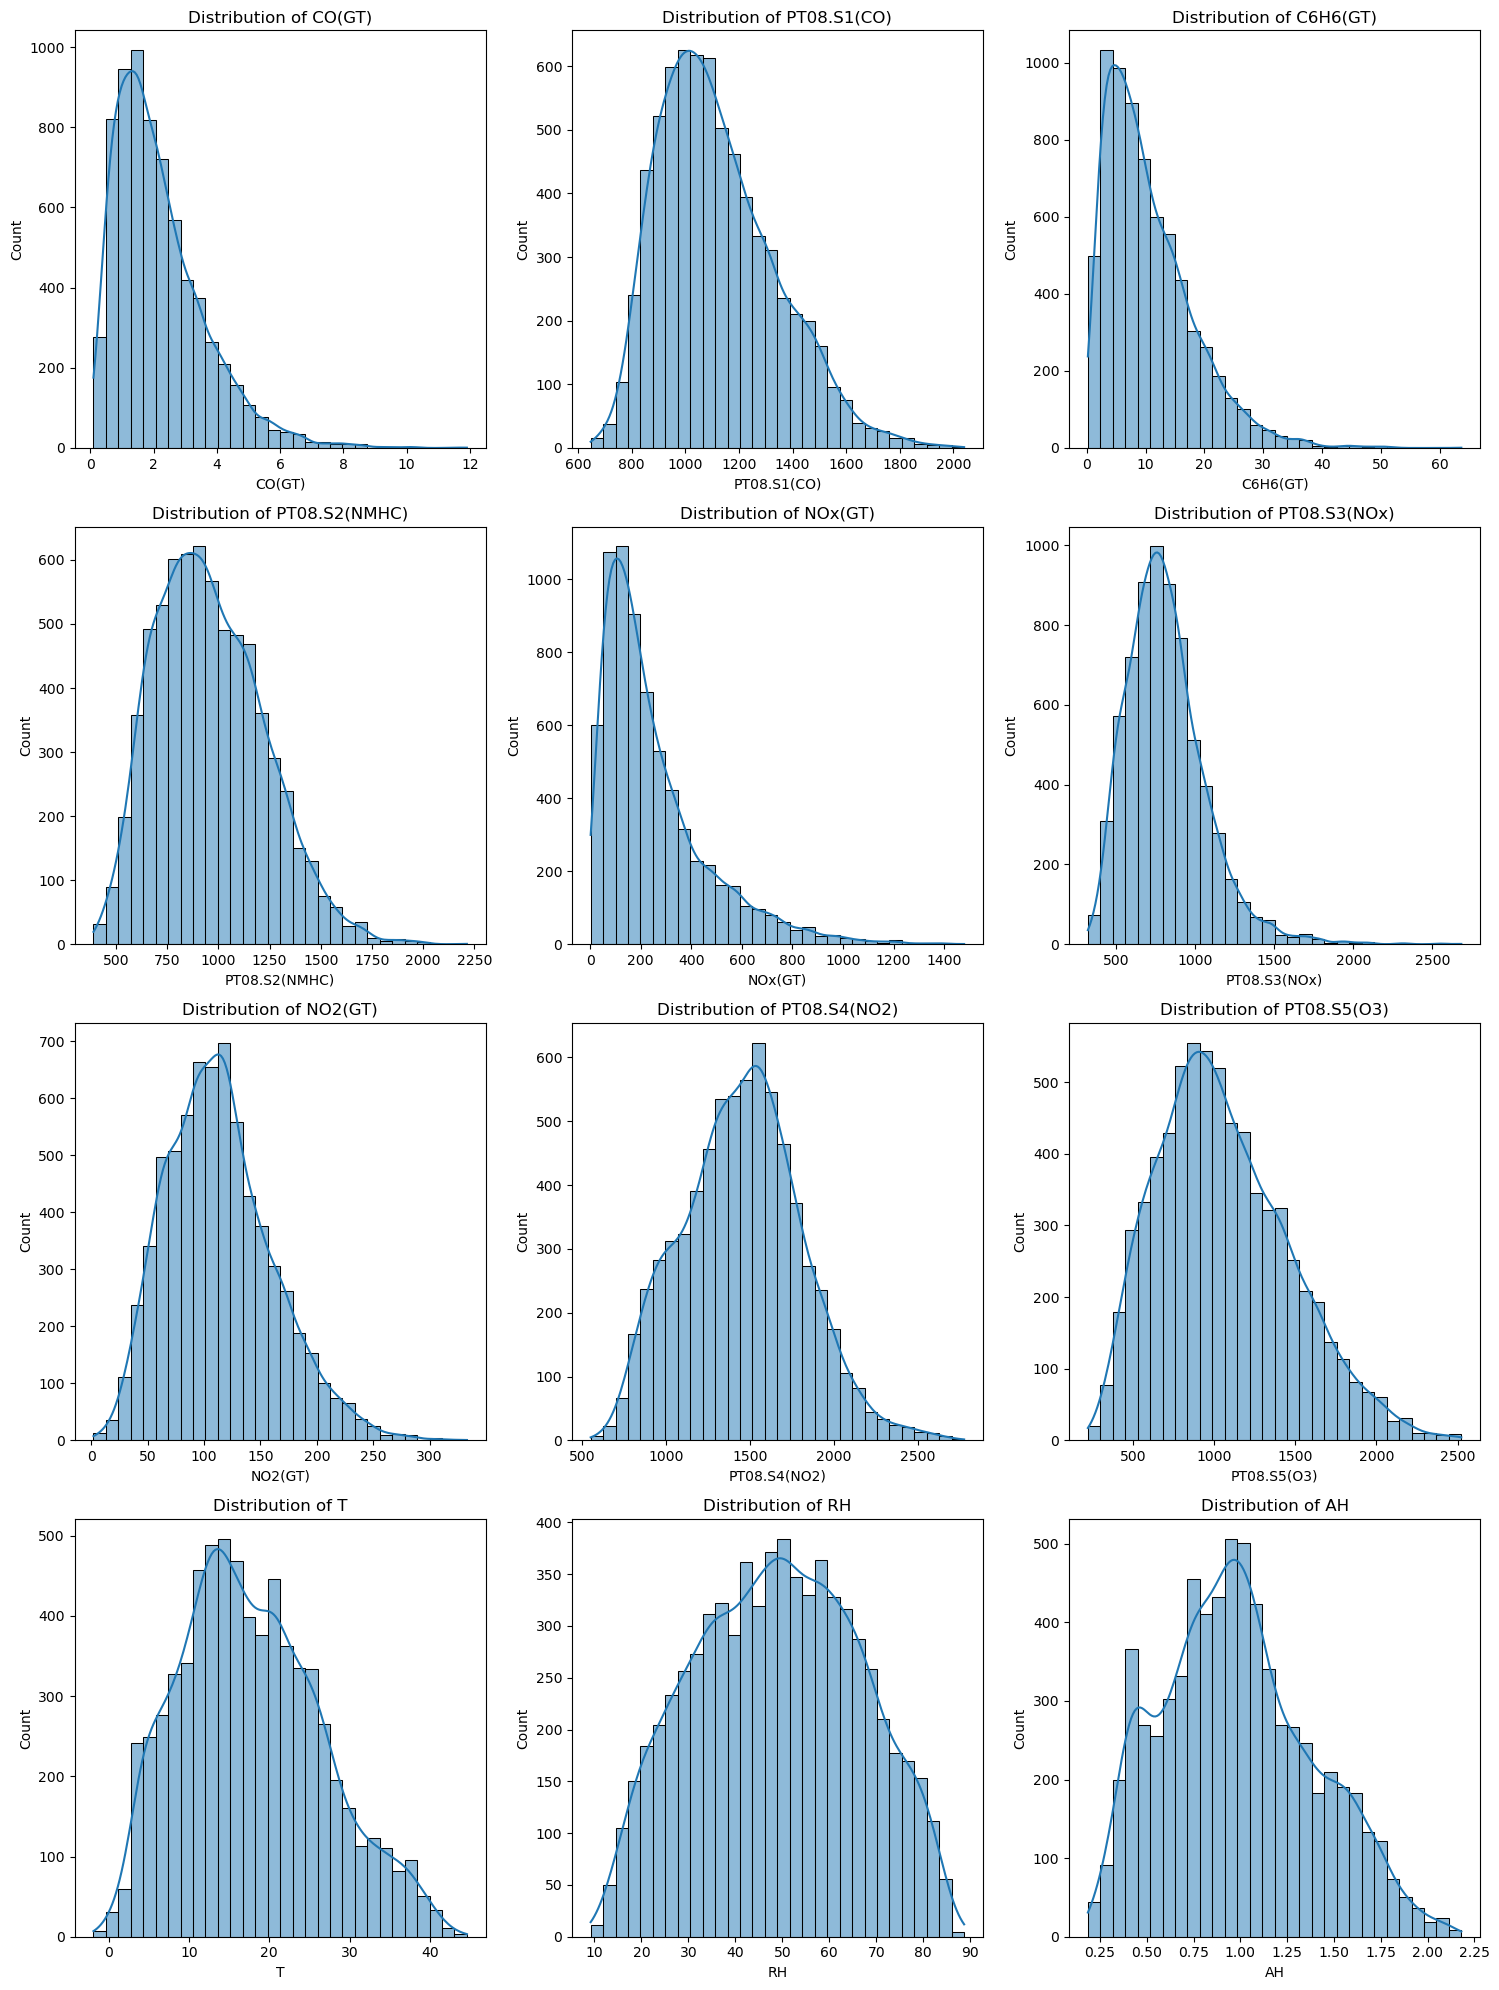

In [9]:
data = pd.read_csv(cleaned_file_path)

if 'Date' in data.columns and 'Time' in data.columns:

    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')
    data = data.drop(columns=['Date', 'Time'], errors='ignore')

data_numeric = data.select_dtypes(include=[float, int])

correlation_matrix = data_numeric.corr()

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
axes = axes.flatten()
for idx, column in enumerate(data_numeric.columns):
    sns.histplot(data=data_numeric, x=column, kde=True, ax=axes[idx], bins=30)
    axes[idx].set_title(f"Distribution of {column}")

plt.tight_layout()



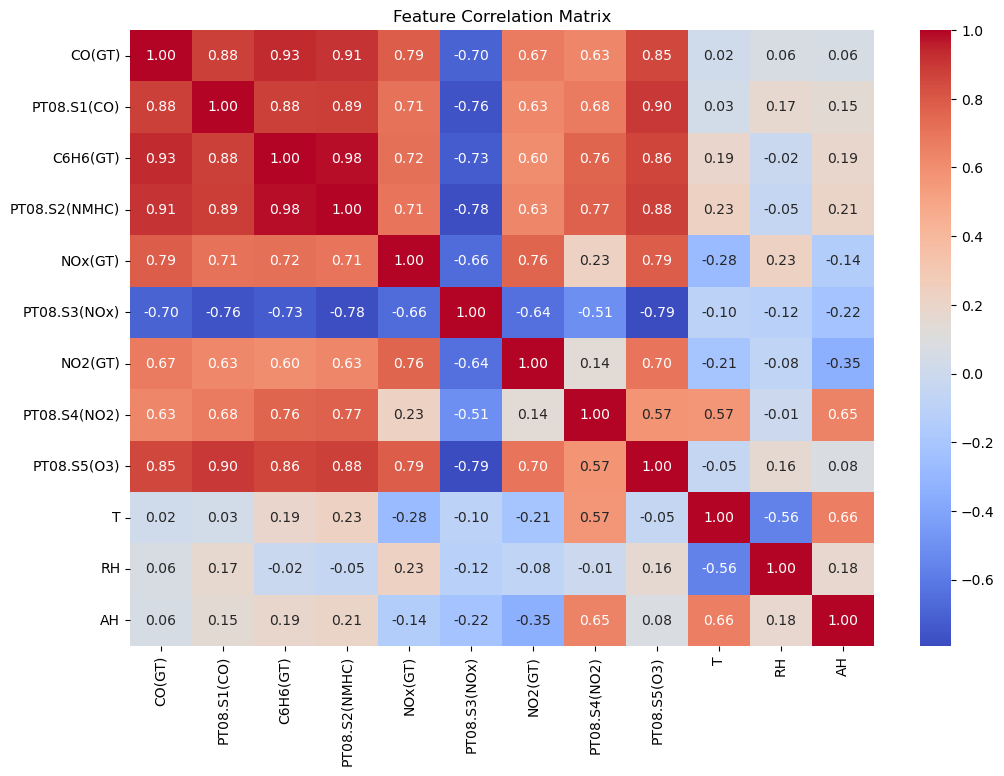

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()


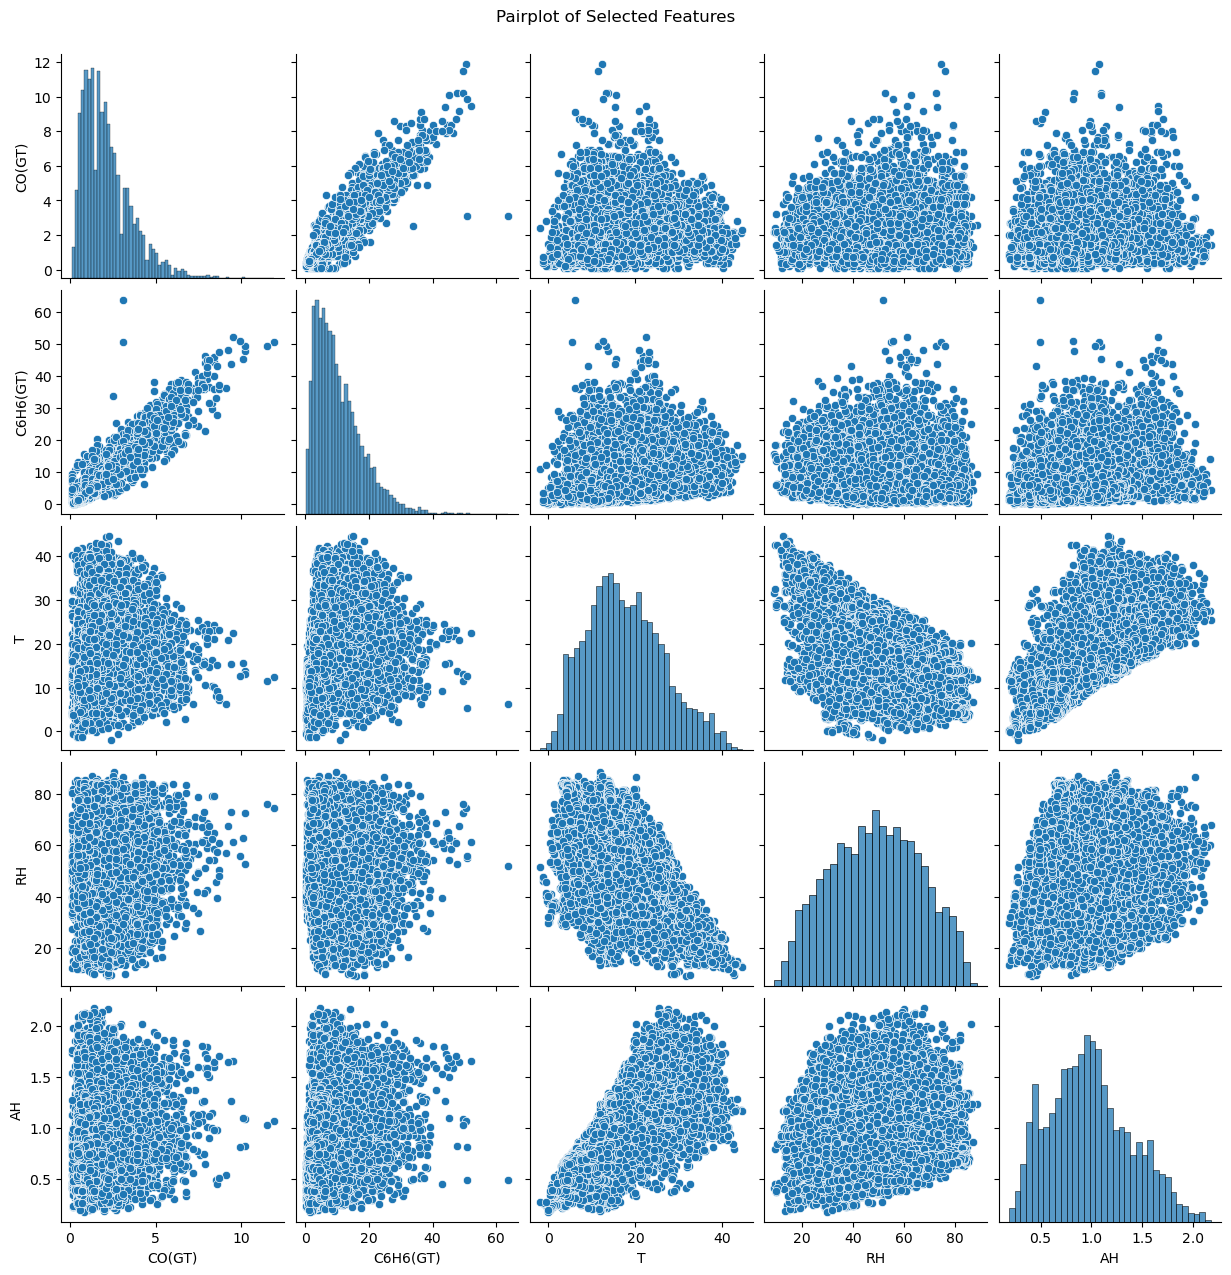

In [11]:
selected_features = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
sns.pairplot(data[selected_features])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

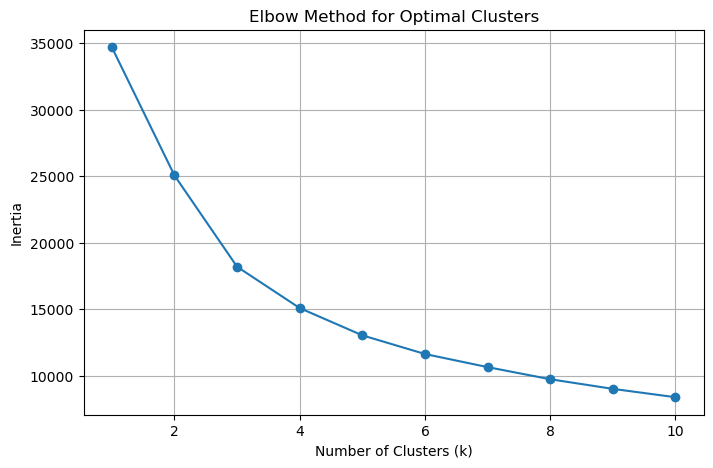

(Cluster
 2    3108
 1    2390
 0    1443
 Name: count, dtype: int64,
 0.30141025004234145)

In [12]:
clustering_features = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
clustering_data = data[clustering_features]

scaler = StandardScaler()
normalized_data = scaler.fit_transform(clustering_data)

inertia = []
cluster_range = range(1, 11)  
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(normalized_data)

silhouette_avg = silhouette_score(normalized_data, data['Cluster'])

data['Cluster'].value_counts(), silhouette_avg


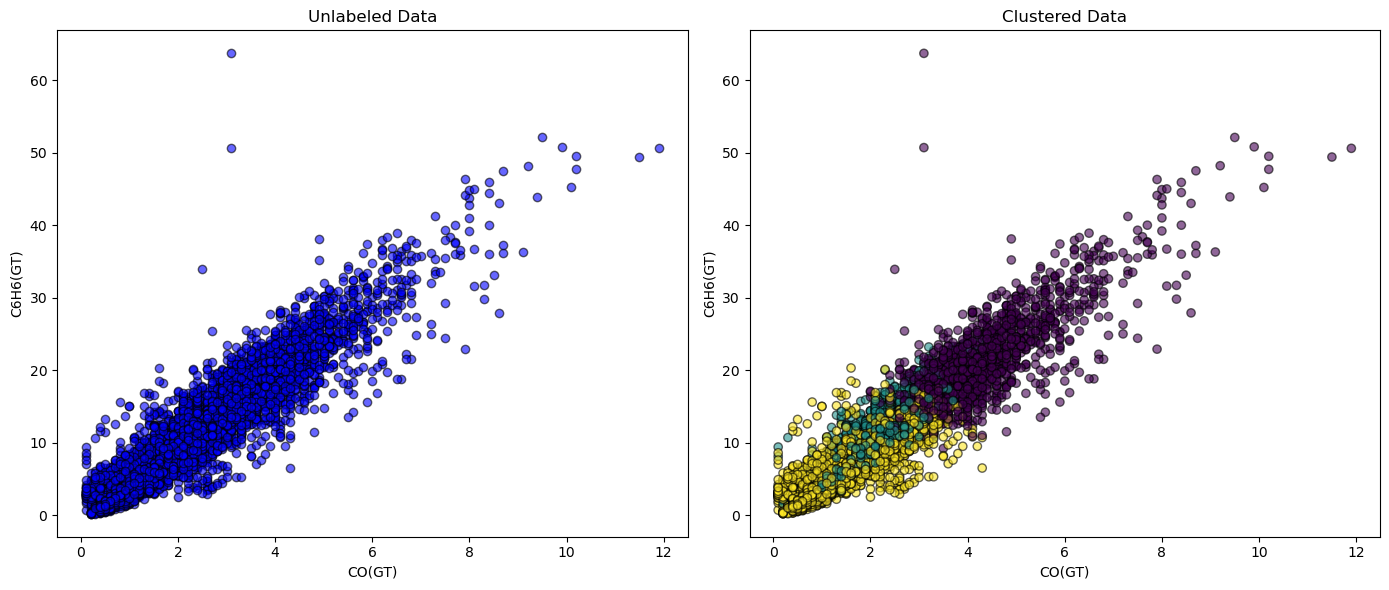

In [13]:
# Visualize the clustering results using two key features ('CO(GT)' and 'C6H6(GT)')
plt.figure(figsize=(14, 6))

# Unlabeled data
plt.subplot(1, 2, 1)
plt.scatter(clustering_data['CO(GT)'], clustering_data['C6H6(GT)'], c='blue', alpha=0.6, edgecolor='k')
plt.xlabel('CO(GT)')
plt.ylabel('C6H6(GT)')
plt.title('Unlabeled Data')

# Clustered data
plt.subplot(1, 2, 2)
plt.scatter(clustering_data['CO(GT)'], clustering_data['C6H6(GT)'], c=data['Cluster'], cmap='viridis', alpha=0.6, edgecolor='k')
plt.xlabel('CO(GT)')
plt.ylabel('C6H6(GT)')
plt.title('Clustered Data')

plt.tight_layout()
plt.show()


In [14]:
target = data['CO(GT)']  
predictors = data[['C6H6(GT)', 'T', 'RH', 'AH']] 

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

linear_model_original = LinearRegression()
linear_model_original.fit(X_train, y_train)

y_pred_original = linear_model_original.predict(X_test)
rmse_original = mean_squared_error(y_test, y_pred_original, squared=False)  # RMSE
r2_original = r2_score(y_test, y_pred_original)  # R-squared score

print(f"Root Mean Squared Error (RMSE) Before SVD: {rmse_original:.4f}")
print(f"R-Squared (R²) Before SVD: {r2_original:.4f}")


Root Mean Squared Error (RMSE) Before SVD: 0.4400
R-Squared (R²) Before SVD: 0.8975


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Randomized SVD

In [16]:
# Input: Normalized data (5 features)
A = np.array(normalized_data)  
k = 5

# Step 1: Generate a random projection matrix
random_matrix = np.random.randn(A.shape[1], k)

# Step 2: Project the original matrix A onto a lower-dimensional subspace
Y = A @ random_matrix

# Step 3: Perform QR decomposition to orthogonalize Y
Q, R = np.linalg.qr(Y, mode='reduced')

# Step 4: Compute the SVD of the smaller matrix (Q^T * A)
B = Q.T @ A
U_hat, Sigma, VT = np.linalg.svd(B, full_matrices=False)

# Step 5: Reconstruct the approximate U, Sigma, and V matrices for the original A
U = Q @ U_hat
Sigma = np.diag(Sigma)

# Reduced representation of the data (dimensionality-reduced data)
reduced_data = U @ Sigma

# Display the reduced data shape and first few rows
reduced_data.shape, reduced_data[:5]


((6941, 5),
 array([[-0.13339575,  0.67350143,  0.43381964,  0.00990977,  0.00399716],
        [-0.60142572,  0.3986963 ,  0.44248629, -0.0461568 ,  0.01443092],
        [-0.64930773,  0.68030184,  0.1505059 ,  0.06690272, -0.02993052],
        [-0.6876091 ,  0.87405107, -0.15777104,  0.0317505 , -0.08042851],
        [-1.12335442,  0.54651838, -0.2422957 ,  0.00115709, -0.08485223]]))

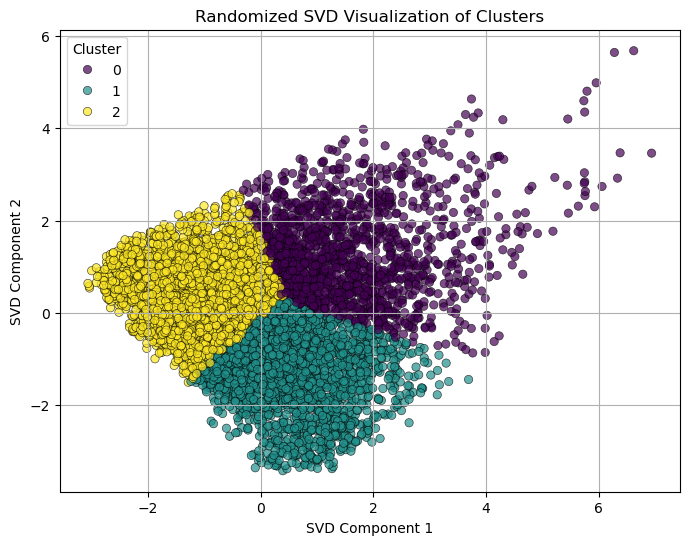

In [17]:

# Perform Randomized SVD on the clustering data (5 features)
svd = TruncatedSVD(n_components=2, random_state=42)
reduced_data = svd.fit_transform(normalized_data)

data['SVD_1'] = reduced_data[:, 0]
data['SVD_2'] = reduced_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['SVD_1'], y=data['SVD_2'], hue=data['Cluster'], palette='viridis', alpha=0.7, edgecolor='k')
plt.title("Randomized SVD Visualization of Clusters")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()


### Low-rank approximation

In [19]:
# Low-rank approximation using the Randomized SVD approach

# Reconstruct the low-rank approximation of the original matrix
low_rank_approximation = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

# Compute the reconstruction error using the Frobenius norm
reconstruction_error = np.linalg.norm(A - low_rank_approximation, 'fro') / np.linalg.norm(A, 'fro')

# Display the low-rank approximation shape and reconstruction error
low_rank_approximation.shape, reconstruction_error


((6941, 5), 2.4592925003628824e-15)

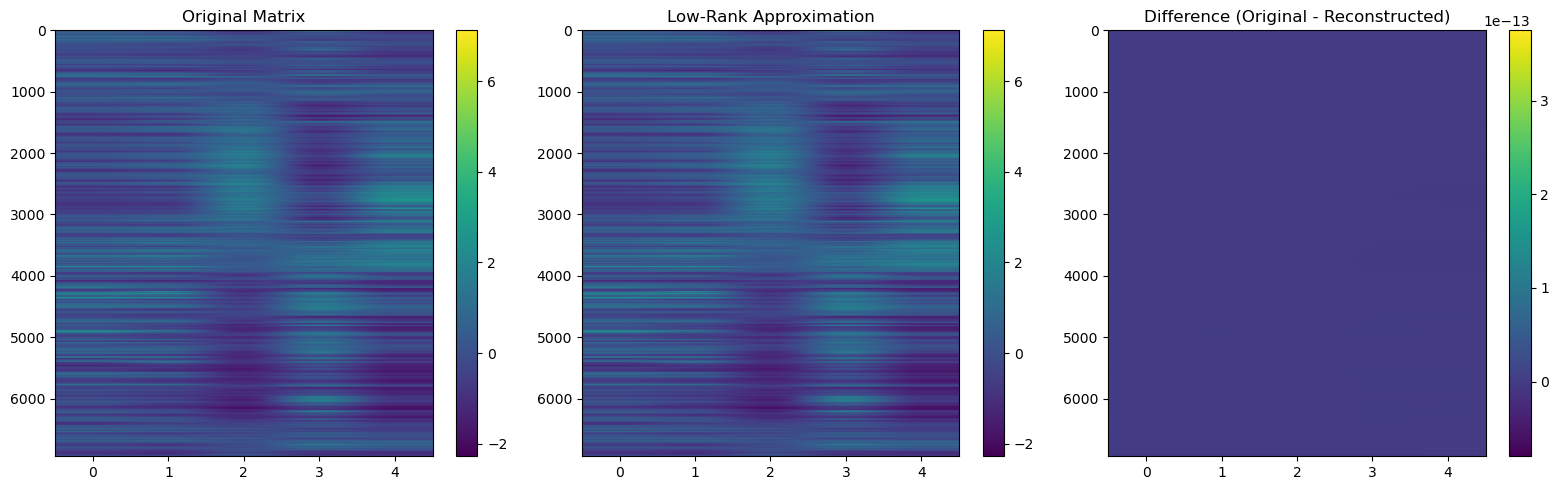

In [20]:
# Visualize the original matrix vs the low-rank approximation

# Compute the difference between the original and reconstructed matrices
difference_matrix = A - low_rank_approximation

# Original matrix
plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1)
plt.imshow(A, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Original Matrix')

# Low-rank approximation
plt.subplot(1, 3, 2)
plt.imshow(low_rank_approximation, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Low-Rank Approximation')

# Difference matrix
plt.subplot(1, 3, 3)
plt.imshow(difference_matrix, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title('Difference (Original - Reconstructed)')

plt.tight_layout()
plt.show()


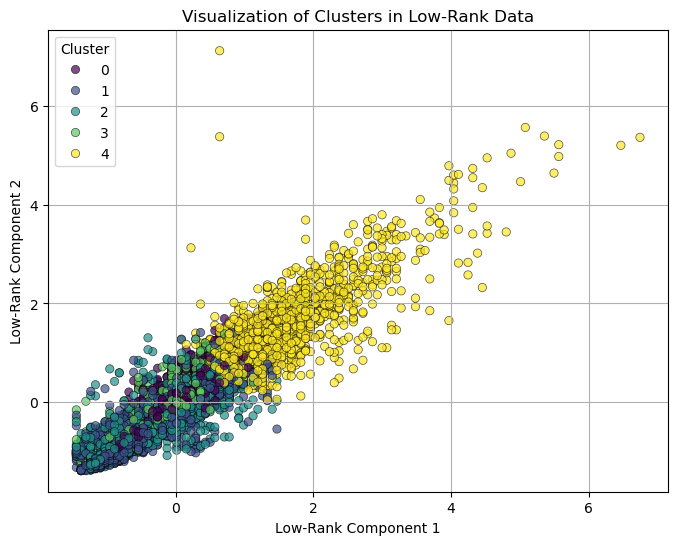

0.26530275105403134

In [21]:
low_rank_data = low_rank_approximation  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(low_rank_data)

data['Cluster_LowRank'] = clusters

silhouette_avg = silhouette_score(low_rank_data, clusters)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=low_rank_data[:, 0], y=low_rank_data[:, 1], hue=data['Cluster_LowRank'], palette='viridis', alpha=0.7, edgecolor='k')
plt.title("Visualization of Clusters in Low-Rank Data")
plt.xlabel("Low-Rank Component 1")
plt.ylabel("Low-Rank Component 2")
plt.legend(title="Cluster")
plt.grid()
plt.show()

silhouette_avg


In [22]:
# Step 1: Perform Randomized SVD for Dimensionality Reduction
k_components = 5  # Set the number of components for low-rank approximation
svd = TruncatedSVD(n_components=k_components, random_state=42)
low_rank_data = svd.fit_transform(normalized_data)  # Reduced data using SVD

# Step 2: Linear Regression Model After SVD
# Define target and predictors
target = data['CO(GT)']  # Define the target variable
X_train, X_test, y_train, y_test = train_test_split(low_rank_data, target, test_size=0.2, random_state=42)

# Fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_lr = linear_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)  # RMSE
r2_lr = r2_score(y_test, y_pred_lr)  # R-squared score

# Output metrics
rmse_lr, r2_lr


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2.415250891353245e-15, 1.0)